In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [52]:
k_map={
    ' US.':1,
    ' Europe.':2,
    ' Japan.':3
}

In [53]:
df=pd.read_csv('cars.csv')
df['category']=df[' brand'].map(k_map)
df=df.drop(columns=[' brand'])
df=df.dropna(how='any')
df[' cubicinches']=df[' cubicinches'].replace([' '],rd.randint(100,450))
df[' cubicinches']=df[' cubicinches'].astype(int)
df[' weightlbs']=df[' weightlbs'].replace([' '],rd.randint(1900,4500))
df[' weightlbs']=df[' weightlbs'].astype(int)
display(df)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,category
0,14.0,8,350,165,4209,12,1972,1
1,31.9,4,89,71,1925,14,1980,2
2,17.0,8,302,140,3449,11,1971,1
3,15.0,8,400,150,3761,10,1971,1
4,30.5,4,98,63,2051,17,1978,1
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,1
257,36.1,4,91,60,1800,16,1979,3
258,22.0,6,232,112,2835,15,1983,1
259,18.0,6,232,100,3288,16,1972,1


In [54]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

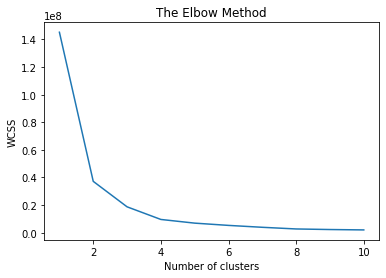

In [56]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(X_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [58]:
y_pred=kmeans.fit_predict(X_test)

In [59]:
y_pred

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1,
       1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0,
       1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1],
      dtype=int32)

In [60]:
from sklearn import metrics
metrics.adjusted_rand_score(Y_test,y_pred)

0.1949042348523323

In [61]:
metrics.adjusted_mutual_info_score(Y_test,y_pred)

0.2644728223990486